<a href="https://colab.research.google.com/github/bpizarrogalleguillos/IAmetodologia2025/blob/main/Taller_Supervisado_1_Regresi%C3%B3n_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos supervisados


## Objetivo
Entregar una comprensión básica de los modelos supervisados en machine learning y cómo se aplican en contextos clínicos, especialmente en radiología, utilizando ejemplos guiados en Google Colab autoejecutable sin necesidad de conocimientos avanzados de programación.

# Aprendizaje esperado

1. Conocer los tipos de problema donde los modelos supervisados pueden ser aplicados
2. Entender el concepto de variables y como se integran al flujo de trabajo en un proyecto de ML supervisado
3. Identificar modelos de ML supervisados y cómo se evalúa su rendimiento

## Temario

## Tipos de problemas supervisados
* Regresión
* Predicción - Clasificación

## Variables
* Features
* Labels

## Flujo de trabajo en un proyecto
* Recolección de datos
* Pre procesamiento
* División del dataset
* Entrenamiento
* Evaluación

## Modelos
* Regresión Lineal
* Regresión Logística
* SVM
* Random Forest
* Perceptrón y Red Neuronal

## Métricas de desempeño
* Accuracy
* Sensitivity
* Recall
* Curvas AUC/ROC

# Ejemplo en radiología
* Neumonía


# Glosario términos claves

- **Modelo supervisado:** Algoritmo que aprende a partir de datos etiquetados (donde se conoce el resultado).
- **Regresión:** Predice un valor numérico continuo (ej. nivel de PCR).
- **Clasificación:** Predice una categoría (ej. tiene o no tiene neumonía).
- **Features (X):** Variables de entrada o características del paciente (edad, fiebre, PCR, etc.).
- **Label (y):** Variable objetivo que queremos predecir (ej. diagnóstico de neumonía).
- **Overfitting:** El modelo memoriza demasiado los datos de entrenamiento y no generaliza bien.
- **Underfitting:** El modelo no aprende patrones útiles; tiene bajo rendimiento en todos los datos.
- **Train/Test Split:** Dividir los datos para que el modelo se entrene en unos y se evalúe en otros.
- **Validation Set:** Subconjunto de entrenamiento usado para ajustar hiperparámetros.
- **ROC Curve:** Muestra el balance entre sensibilidad y especificidad.
- **AUC (Área bajo la curva):** Mide la capacidad de discriminación del modelo; más alto es mejor.
- **Precision:** De todos los positivos predichos, cuántos eran realmente positivos.
- **Recall (Sensibilidad):** De todos los positivos reales, cuántos fueron correctamente identificados.

# Tipos de problemas supervisados

# Ejemplo en Radiología


Primero debemos instalar las liberías que usaremos. Podemos pensar las librerías como pequeños "programas" que ya fueron programados y que contienen funciones que podemos usar para diferentes tareas específicas.

In [1]:
# Cuaderno de Google Colab: Introducción a Machine Learning Supervisado en Radiología

#@title 🔍 Introducción
"""
Este cuaderno interactivo tiene como objetivo enseñar los conceptos básicos de Machine Learning supervisado
aplicados a un caso clínico simplificado de radiología.

👩‍⚕️ Caso: Predicción de neumonía en base a datos clínicos y hallazgos imagenológicos.
"""

#@title 📦 Instalación de librerías necesarias (solo si da error en tu entorno)
# Si estás en Google Colab, normalmente ya están instaladas.
!pip install -q pandas scikit-learn matplotlib seaborn

#@title 📁 Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [85]:
# Interactive a
import ipywidgets as widgets
from ipywidgets import interact
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
# Gradio
!pip install gradio
import gradio as gr

In [2]:
# Tutorial Interactivo de Regresión Lineal para Residentes de Radiología

# En este ejemplo, aprenderás a:
#   - Generar datos de ejemplo de forma interactiva.
#   - Ajustar un modelo de regresión lineal.
#   - Visualizar la línea de regresión junto con los datos.
#   - Interpretar los resultados: pendiente, intercepto y coeficiente de determinación (R²).
#
# Nota: En este ejemplo, suponemos que 'x' podría representar, por ejemplo, la dosis de radiación, y 'y'
#       alguna medida extraída de una imagen radiológica. La idea es facilitar la interpretación práctica
#       de los resultados sin profundizar excesivamente en la matemática subyacente.

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import ipywidgets as widgets
from ipywidgets import interact
import statsmodels.api as sm

def regression_demo(slope=1.0, intercept=0.0, noise=1.0, n_points=50):
    # Fijamos una semilla para obtener resultados reproducibles
    np.random.seed(42)

    # Generación de los datos:
    # Creamos una variable independiente 'x' de forma equidistante, que se puede interpretar como,
    # por ejemplo, la dosis de radiación.
    x = np.linspace(0, 10, n_points)
    # Creamos la variable dependiente 'y' aplicando una relación lineal (slope*x + intercept)
    # a la que se le añade un término aleatorio que simula la variabilidad en los datos (ruido).
    y = slope * x + intercept + np.random.normal(0, noise, n_points)

    # Preparamos los datos para el modelo de regresión (scikit-learn requiere un formato 2D para X)
    X = x.reshape(-1, 1)

    # Ajustamos el modelo de regresión lineal utilizando scikit-learn
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    # Calculamos el coeficiente de determinación R², que nos indica qué tan bien el modelo explica la variabilidad
    r2 = r2_score(y, y_pred)

    # También ajustamos el modelo usando statsmodels para obtener un resumen estadístico completo
    X_sm = sm.add_constant(x)
    model_sm = sm.OLS(y, X_sm).fit()

    # Visualizamos los datos y la línea de regresión
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Datos observados')
    plt.plot(x, y_pred, color='red', label='Línea de regresión')
    plt.xlabel('Variable Independiente (Ej: Dosis de radiación)')
    plt.ylabel('Variable Dependiente (Ej: Medida de imagen)')
    plt.title('Demostración Interactiva de Regresión Lineal')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostramos los parámetros obtenidos del modelo con scikit-learn
    print("Parámetros del modelo:")
    print(f"   Pendiente (coeficiente): {model.coef_[0]:.3f}")
    print(f"   Intercepto: {model.intercept_:.3f}")
    print(f"   Coeficiente de determinación (R²): {r2:.3f}")

    # Presentamos el resumen detallado obtenido con statsmodels
    print("\nResumen del modelo (statsmodels):")
    print(model_sm.summary())

    # Explicación e interpretación de los resultados:
    print("\nInterpretación de los resultados:")
    print("   - La pendiente indica el cambio esperado en la variable dependiente por cada unidad de incremento en la variable independiente.")
    print("     Por ejemplo, si la pendiente es 2, se espera que la medida de imagen aumente 2 unidades por cada incremento en la dosis de radiación.")
    print("   - El intercepto es el valor estimado de la variable dependiente cuando la variable independiente es cero.")
    print("   - El coeficiente de determinación (R²) indica qué proporción de la variabilidad en los datos se explica por el modelo.")
    print("     Un valor de R² cercano a 1 sugiere un ajuste excelente, mientras que uno cercano a 0 indica un ajuste pobre.")
    print("   - En el resumen de statsmodels se puede observar también el valor 'P>|t|' para cada coeficiente,")
    print("     que indica si la relación encontrada es estadísticamente significativa.")

# Creamos la interfaz interactiva para que el usuario pueda modificar los parámetros y observar los cambios en tiempo real.
interact(regression_demo,
         slope=widgets.FloatSlider(min=-5.0, max=5.0, step=0.1, value=1.0, description='Pendiente:'),
         intercept=widgets.FloatSlider(min=-10.0, max=10.0, step=0.1, value=0.0, description='Intercepto:'),
         noise=widgets.FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description='Ruido:'),
         n_points=widgets.IntSlider(min=20, max=200, step=10, value=50, description='Número de puntos:')
        )

interactive(children=(FloatSlider(value=1.0, description='Pendiente:', max=5.0, min=-5.0), FloatSlider(value=0…

<function __main__.regression_demo(slope=1.0, intercept=0.0, noise=1.0, n_points=50)>

In [22]:
# Demostración Interactiva de Regresión Lineal con Datos Simulados - Gradio

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import gradio as gr

# -----------------------------------------------------------
# 1. Función de regresión interactiva con datos simulados
# -----------------------------------------------------------
def regression_demo_gradio(slope=1.0, intercept=0.0, noise=1.0, n_points=50):
    np.random.seed(42)
    x = np.linspace(0, 10, n_points)
    y = slope * x + intercept + np.random.normal(0, noise, n_points)
    X = x.reshape(-1, 1)

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    X_sm = sm.add_constant(x)
    model_sm = sm.OLS(y, X_sm).fit()

    # Gráfico de regresión
    fig, ax = plt.subplots(figsize=(7, 5))
    ax.scatter(x, y, color='blue', label='Datos observados')
    ax.plot(x, y_pred, color='red', label='Línea de regresión')
    ax.set_xlabel('Variable Independiente (Ej: Dosis de radiación)')
    ax.set_ylabel('Variable Dependiente (Ej: Medida de imagen)')
    ax.set_title('Gráfico de Regresión')
    ax.grid(True)
    ax.legend()
    plt.tight_layout()

    # Resumen del modelo
    resumen = f"Pendiente: {model.coef_[0]:.3f}\n"
    resumen += f"Intercepto: {model.intercept_:.3f}\n"
    resumen += f"Coeficiente de determinación (R²): {r2:.3f}\n\n"
    resumen += "Resumen completo del modelo (statsmodels):\n"
    resumen += str(model_sm.summary())

    # Interpretación automatizada
    interpretacion = ("\nInterpretación:\n"
        "- La pendiente indica el cambio esperado en la variable dependiente por unidad de incremento en la independiente.\n"
        "- El intercepto es el valor estimado cuando la variable independiente es 0.\n"
        "- El coeficiente R² indica qué proporción de la variabilidad es explicada por el modelo.\n")
    if r2 >= 0.7:
        interpretacion += "  → El modelo presenta un ajuste fuerte.\n"
    elif r2 >= 0.4:
        interpretacion += "  → Ajuste moderado, pueden influir otras variables.\n"
    else:
        interpretacion += "  → Pobre ajuste, el modelo explica poco la variabilidad.\n"

    return fig, resumen, interpretacion

# -----------------------------------------------------------
# 2. Interfaz de usuario Gradio
# -----------------------------------------------------------
iface = gr.Interface(
    fn=regression_demo_gradio,
    inputs=[
        gr.Slider(minimum=-5.0, maximum=5.0, step=0.1, value=1.0, label="Pendiente (slope)"),
        gr.Slider(minimum=-10.0, maximum=10.0, step=0.1, value=0.0, label="Intercepto"),
        gr.Slider(minimum=0.1, maximum=5.0, step=0.1, value=1.0, label="Nivel de ruido"),
        gr.Slider(minimum=20, maximum=200, step=10, value=50, label="Número de puntos")
    ],
    outputs=[
        gr.Plot(label="Gráfico de regresión"),
        gr.Textbox(label="Resumen del modelo", lines=30),
        gr.Textbox(label="Interpretación", lines=10)
    ],
    title="Regresión Lineal Interactiva con Datos Simulados",
    description="Ajusta los parámetros para visualizar cómo cambian los resultados de una regresión lineal sobre datos sintéticos."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a68004145c5b92a38e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 📋 Flujo completo de ML en Radiología: Diagnóstico de Neumonía
"""
🚀 Flujo de trabajo clásico en Machine Learning:

1. Recolección de datos → Dataset clínico simulado.
2. Preprocesamiento     → Codificación de variables categóricas, limpieza.
3. División del dataset  → Train/Test split.
4. Entrenamiento         → Modelos supervisados.
5. Evaluación            → Métricas: accuracy, recall, curva ROC.
"""

In [73]:
!wget https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv

--2025-05-06 01:40:19--  https://raw.githubusercontent.com/bpizarrogalleguillos/IAmetodologia2025/main/data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17303 (17K) [text/plain]
Saving to: ‘data_2.csv’

data_2.csv          100%[===================>]  16.90K  --.-KB/s    in 0.003s  

2025-05-06 01:40:20 (5.16 MB/s) - ‘data_2.csv’ saved [17303/17303]



In [74]:
pd.read_csv("data_2.csv")

,edad,sexo,fiebre,temperatura,tos,infiltrado_rx,engrosamiento_parietal,foco_condensacion,patron_intersticial,derrame_pleural,broncograma_aereo,cruza_cisuras,leucocitosis,pcr,indice_rx,diagnostico_neumonia,ingreso_uci,intubacion,mortalidad
0,58,F,1,39.0,1,0,0,1,0,1,0,0,12568,44.8,10.7536,1,1,1,1
1,48,F,1,38.4,0,1,0,0,0,0,0,0,11522,37.0,7.1544,1,0,0,0
2,39,F,1,38.6,1,0,0,1,1,0,0,0,15715,48.2,10.5530,1,1,1,1
3,21,M,1,38.3,1,0,1,0,0,0,0,0,13450,47.1,7.5450,1,1,1,0
4,30,M,0,37.1,1,0,0,1,0,0,0,0,6462,18.6,5.2224,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,47,F,1,38.8,0,1,0,1,0,0,0,0,12572,42.5,10.6394,1,1,1,0
296,35,F,1,38.4,1,0,0,0,0,0,0,0,12889,43.7,6.2628,1,1,1,1
297,86,M,0,36.6,1,1,0,0,1,0,0,0,8143,24.9,4.8736,0,0,0,0
298,56,M,1,38.1,0,1,0,0,1,0,1,0,13457,40.2,10.2014,1,0,1,0


In [75]:
#data = pd.read_csv('data_supervisado_1.csv')
#data = pd.read_csv("Datos_cl_nicos_simulados.csv")
#data = pd.read_csv("dataset_clinico_simulado.csv")
data = pd.read_csv("data_2.csv")

# Análisis exploratorio

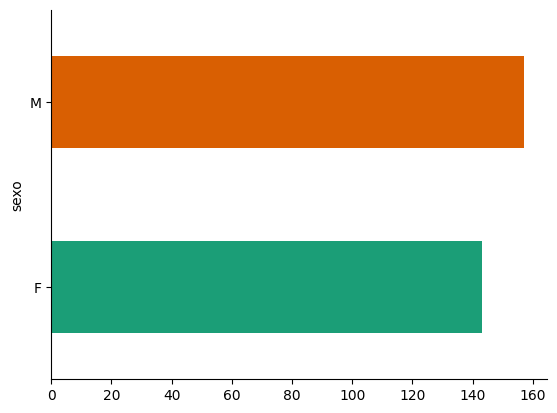

In [76]:
# @title sexo

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

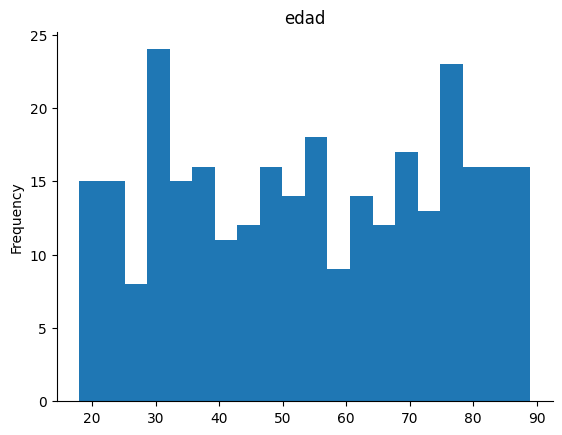

In [77]:
# @title edad

from matplotlib import pyplot as plt
data['edad'].plot(kind='hist', bins=20, title='edad')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

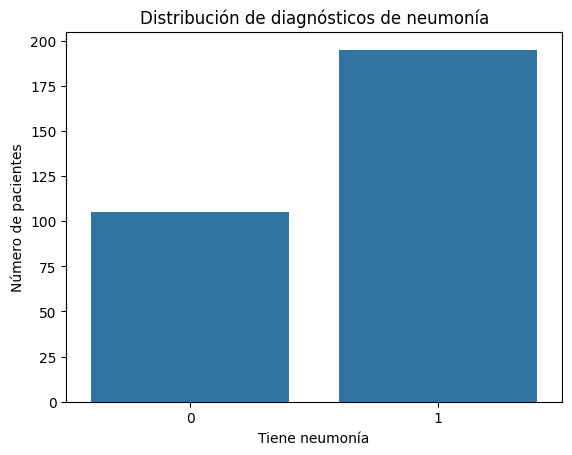

In [78]:
#@title 📈 Visualización básica del dataset
sns.countplot(x='diagnostico_neumonia', data=data)
plt.title("Distribución de diagnósticos de neumonía")
plt.xlabel("Tiene neumonía")
plt.ylabel("Número de pacientes")
plt.show()

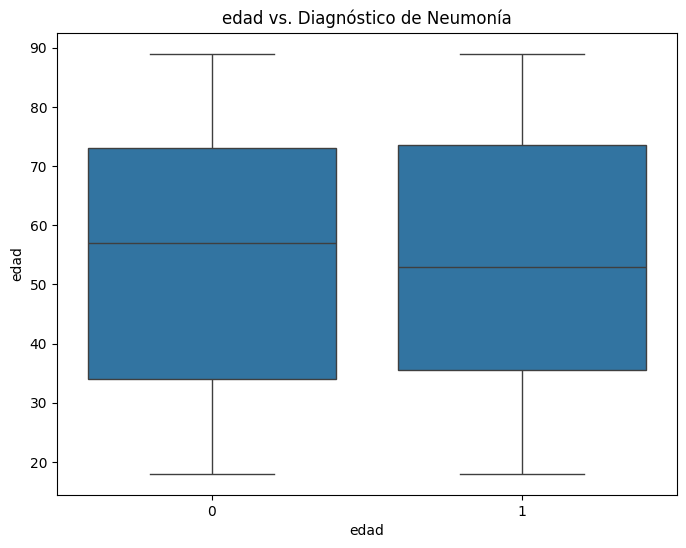

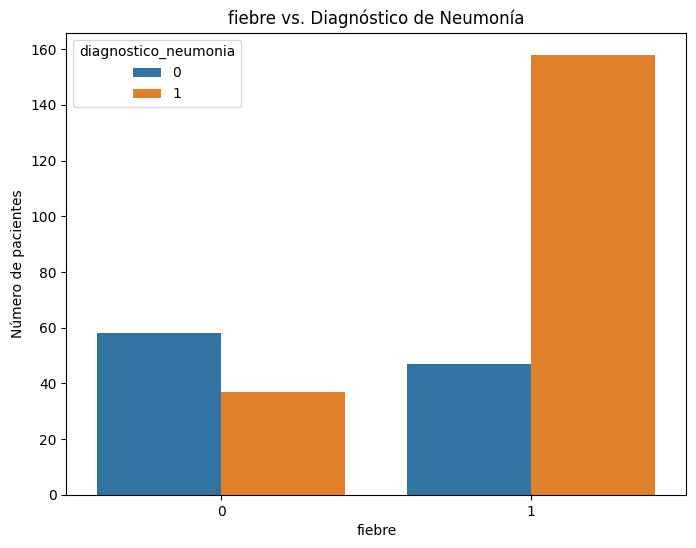

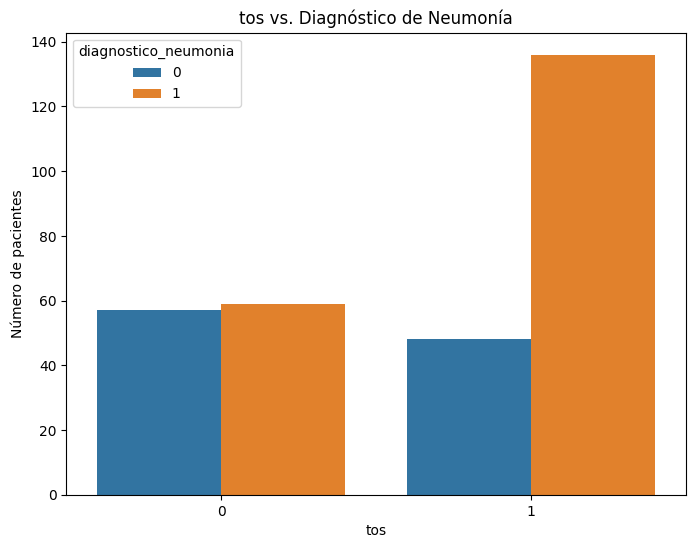

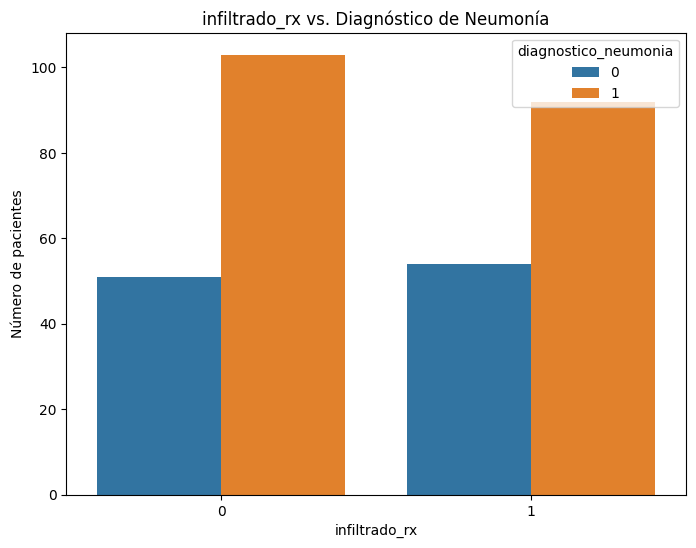

In [79]:
# Lista de variables a comparar con el diagnóstico de neumonía
features_to_plot = ['edad', 'fiebre', 'tos', 'infiltrado_rx']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))

    if data[feature].nunique() <= 2:  # Variables binarias o categóricas simples
        sns.countplot(x=feature, hue='diagnostico_neumonia', data=data)
        plt.ylabel('Número de pacientes')
    else:  # Variables continuas (como edad)
        sns.boxplot(x='diagnostico_neumonia', y=feature, data=data)
        plt.ylabel(feature)

    plt.title(f'{feature} vs. Diagnóstico de Neumonía')
    plt.xlabel(feature)
    plt.show()

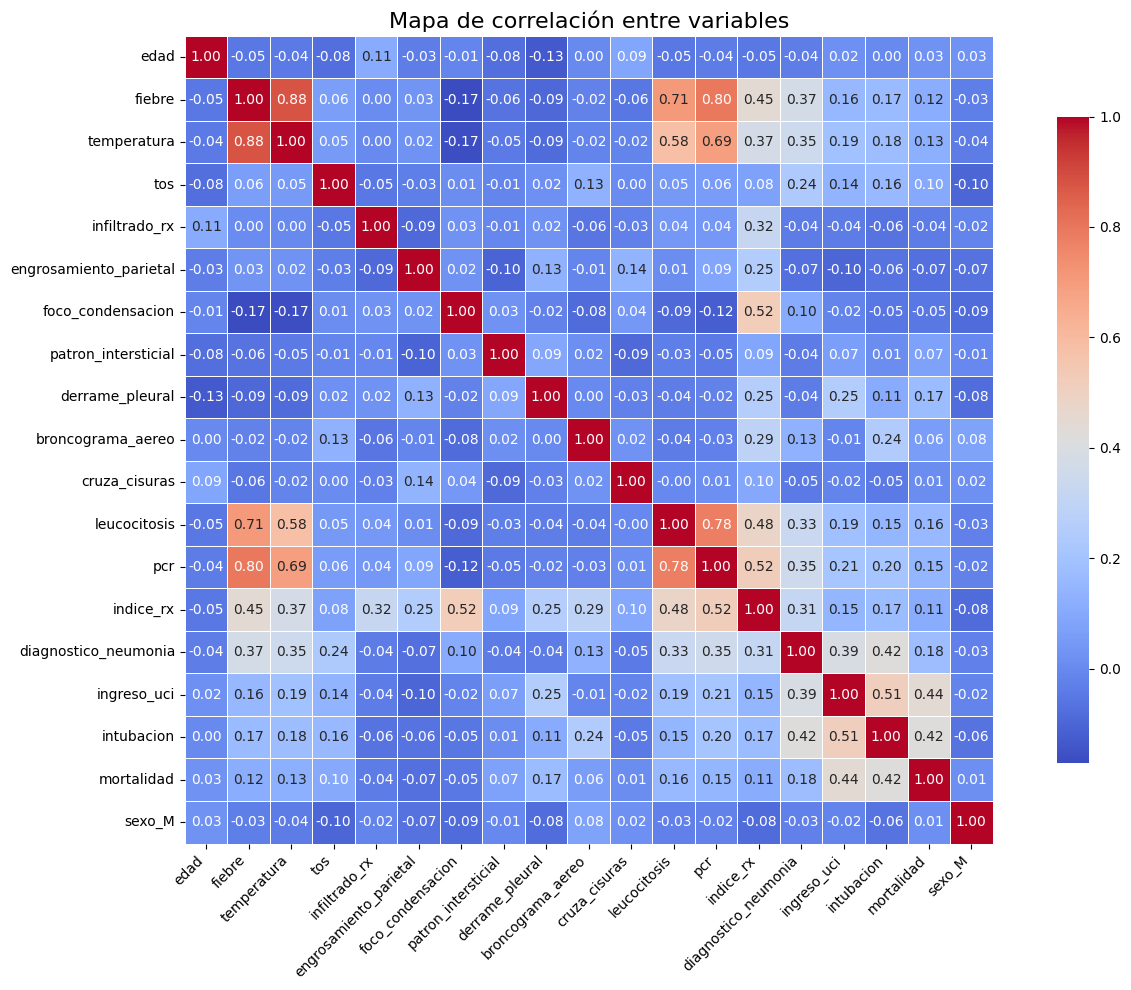

In [80]:
#@title 📊 Mapa de correlación entre variables

# Asegurar que todas las variables categóricas estén codificadas numéricamente
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Calcular matriz de correlación
correlation_matrix = encoded_data.corr()

# Graficar heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    linewidths=0.5
)
plt.title("Mapa de correlación entre variables", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [86]:
#@title 🔄 Preprocesamiento de datos

# Convertir variable categórica 'sexo' a variable numérica
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)

# Eliminar variables que no deben ser usadas como predictoras del diagnóstico
variables_a_excluir = ['ingreso_uci', 'intubacion', 'mortalidad']
X = encoded_data.drop(columns=['diagnostico_neumonia'] + variables_a_excluir)

# Variable objetivo
y = encoded_data['diagnostico_neumonia']

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ejemplo de regresión linea

Ya hemos realizado un análisis exploratorio de los datos. Ahora queremos modelar y poder cuantificar la relación entre ellos. Para esto contamos con una herramienta simple pero de gran utilidad denominada regresión lineal.

En base a lo expuesto en la clase ¿Que variables podrían ser utilizadas para una regresión lineal en este set de datos?

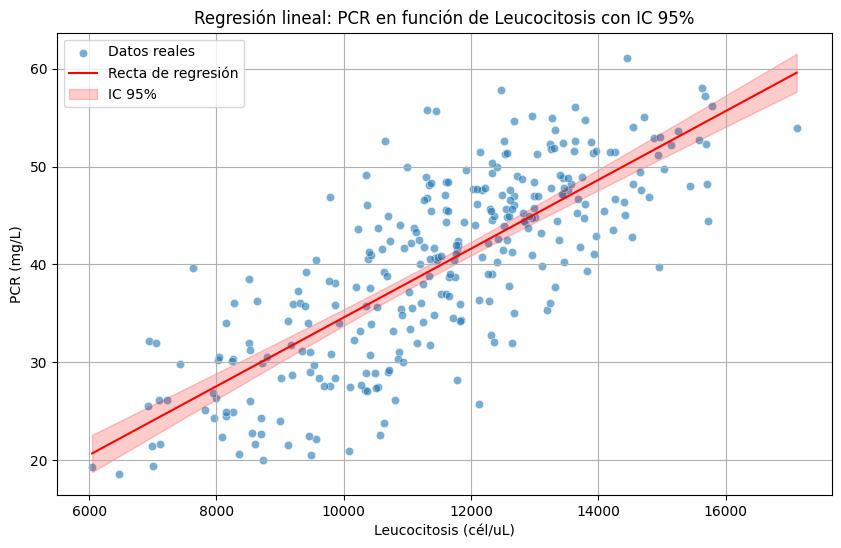

In [83]:
#@title 📈 Regresión lineal con intervalo de confianza del 95%
import statsmodels.api as sm

# Variable independiente y dependiente
X_lin = data[['leucocitosis']]
y_lin = data['pcr']

# Agregar constante para statsmodels
X_lin_const = sm.add_constant(X_lin)

# Ajustar modelo con statsmodels para obtener IC
modelo_lin = sm.OLS(y_lin, X_lin_const).fit()

# Generar valores para predecir y graficar
x_pred = np.linspace(X_lin['leucocitosis'].min(), X_lin['leucocitosis'].max(), 300)
x_pred_df = pd.DataFrame({'leucocitosis': x_pred})
x_pred_const = sm.add_constant(x_pred_df)

# Predicciones con IC
preds = modelo_lin.get_prediction(x_pred_const)
pred_summary = preds.summary_frame(alpha=0.05)  # 95% CI

# Graficar
plt.figure(figsize=(10, 6))
sns.scatterplot(x='leucocitosis', y='pcr', data=data, label='Datos reales', alpha=0.6)
plt.plot(x_pred, pred_summary['mean'], color='red', label='Recta de regresión')
plt.fill_between(x_pred, pred_summary['mean_ci_lower'], pred_summary['mean_ci_upper'], color='red', alpha=0.2, label='IC 95%')
plt.xlabel('Leucocitosis (cél/uL)')
plt.ylabel('PCR (mg/L)')
plt.title('Regresión lineal: PCR en función de Leucocitosis con IC 95%')
plt.legend()
plt.grid(True)
plt.show()

In [88]:
# Tutorial Interactivo de Regresión Lineal para Residentes de Radiología usando un Dataset Real

# En este tutorial se:
#   - Carga un dataset real con variables clínicas y radiológicas.
#   - Permite seleccionar de forma interactiva la variable independiente y la dependiente.
#   - Ajusta un modelo de regresión lineal y muestra la gráfica junto con el modelo.
#   - Explica cómo interpretar la pendiente, el intercepto y el coeficiente de determinación (R²).
#
# Ejemplo de variables en el dataset:
#   - edad, fiebre, tos, infiltrado_rx, engrosamiento_parietal, foco_condensacion,
#     patron_intersticial, derrame_pleural, broncograma_aereo, cruza_cisuras,
#     leucocitosis, pcr, sexo_M
# Puedes pensar en alguna variable (por ejemplo, "edad") como predictor y en otra (por ejemplo, "pcr")
# como medida de respuesta relacionada con análisis radiológicos.



# -----------------------------------------------------------
# 1. Cargar el Dataset
# -----------------------------------------------------------
# Se asume que el archivo 'data_supervisado_1.csv' está en el entorno de Colab.
# Si el dataset está delimitado por tabulaciones, se utiliza sep='\t'
df= data

# Convertir la variable 'sexo_M' de booleana a numérica (0 o 1) para su posible inclusión en la regresión.
#if df['sexo_M'].dtype == 'bool':
#    df['sexo_M'] = df['sexo_M'].astype(int)

# Identificar las columnas numéricas disponibles para el análisis.
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Columnas numéricas disponibles para análisis:", numeric_columns)



Columnas numéricas disponibles para análisis: ['edad', 'fiebre', 'temperatura', 'tos', 'infiltrado_rx', 'engrosamiento_parietal', 'foco_condensacion', 'patron_intersticial', 'derrame_pleural', 'broncograma_aereo', 'cruza_cisuras', 'leucocitosis', 'pcr', 'indice_rx', 'diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad']


In [89]:
# -----------------------------------------------------------
# 2. Definir la Función Interactiva para la Regresión
# -----------------------------------------------------------
def regression_interactive(x_column, y_column):
    """
    Esta función:
      - Extrae la variable independiente (x) y la variable dependiente (y) según la selección.
      - Ajusta un modelo de regresión lineal usando scikit-learn.
      - Calcula el coeficiente de determinación (R²).
      - Obtiene un resumen estadístico completo del modelo con statsmodels.
      - Grafica los datos observados junto a la línea de regresión.
      - Proporciona una interpretación de los resultados.
    """
    # Extraer los datos de las columnas seleccionadas
    X = df[[x_column]].values
    y = df[y_column].values

    # Ajustar el modelo de regresión lineal (scikit-learn)
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Ajuste con statsmodels para obtener un resumen detallado
    X_sm = sm.add_constant(X)  # Agrega constante (intercepto)
    model_sm = sm.OLS(y, X_sm).fit()

    # Graficar los datos y la línea ajustada
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Datos observados')
    plt.plot(X, y_pred, color='red', label='Línea de regresión')
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.title(f'Regresión Lineal: {y_column} vs. {x_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Mostrar parámetros obtenidos con scikit-learn
    print("Parámetros del modelo (scikit-learn):")
    print(f"   Pendiente (coeficiente): {model.coef_[0]:.3f}")
    print(f"   Intercepto: {model.intercept_:.3f}")
    print(f"   Coeficiente de determinación (R²): {r2:.3f}\n")

    # Mostrar resumen detallado del modelo con statsmodels
    print("Resumen detallado del modelo (statsmodels):")
    print(model_sm.summary())

    # Interpretación de los resultados:
    print("\nInterpretación de los resultados:")
    print(f"   - La pendiente de {model.coef_[0]:.3f} indica el cambio esperado en '{y_column}' por cada unidad adicional en '{x_column}'.")
    print("     Por ejemplo, si '{x_column}' representa la 'edad', una pendiente de 0.5 implicaría que por cada año adicional se espera un aumento de 0.5 unidades en '{y_column}'.")
    print("   - El intercepto es el valor de '{y_column}' cuando '{x_column}' es 0, lo cual en algunos contextos puede o no tener interpretación clínica directa.")
    print("   - El coeficiente de determinación (R²) indica la proporción de la variabilidad observada en los datos que es explicada por el modelo.")
    if r2 >= 0.7:
        print("     Un R² alto (cercano a 1) sugiere un buen ajuste del modelo.")
    elif r2 >= 0.4:
        print("     Un R² moderado indica que el modelo explica parte de la variabilidad, pero hay otros factores involucrados.")
    else:
        print("     Un R² bajo (cercano a 0) sugiere que el modelo tiene limitaciones para explicar la variabilidad de los datos.")
    print("   - Revisa los valores de p-value en el resumen de statsmodels para entender la significancia estadística de los coeficientes.")

# -----------------------------------------------------------
# 3. Crear la Interfaz Interactiva
# -----------------------------------------------------------
# Se generan widgets para seleccionar, de entre las columnas numéricas, la variable independiente (x)
# y la variable dependiente (y).
interact(regression_interactive,
         x_column=widgets.Dropdown(options=numeric_columns, value=numeric_columns[0],
                                   description='Variable independiente:'),
         y_column=widgets.Dropdown(options=numeric_columns,
                                   value=numeric_columns[1] if len(numeric_columns) > 1 else numeric_columns[0],
                                   description='Variable dependiente:'))

interactive(children=(Dropdown(description='Variable independiente:', options=('edad', 'fiebre', 'temperatura'…

<function __main__.regression_interactive(x_column, y_column)>

In [90]:


# -----------------------------------------------------------
# 1. Cargar el Dataset
# -----------------------------------------------------------
df = data
numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# -----------------------------------------------------------
# 2. Funciones de Regresión y Explicación
# -----------------------------------------------------------
def regression_gradio(x_column, y_column):
    X = df[[x_column]].values
    y = df[y_column].values

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    X_sm = sm.add_constant(X)
    model_sm = sm.OLS(y, X_sm).fit()

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(X, y, color='blue', label='Datos observados')
    ax.plot(X, y_pred, color='red', label='Línea de regresión')
    ax.set_xlabel(x_column)
    ax.set_ylabel(y_column)
    ax.set_title(f'{y_column} vs. {x_column}')
    ax.legend()
    ax.grid(True)
    plt.tight_layout()

    resumen = f"Pendiente: {model.coef_[0]:.3f}\n"
    resumen += f"Intercepto: {model.intercept_:.3f}\n"
    resumen += f"Coeficiente de determinación (R²): {r2:.3f}\n"
    if r2 >= 0.7:
        resumen += "Buen ajuste del modelo.\n"
    elif r2 >= 0.4:
        resumen += "Ajuste moderado.\n"
    else:
        resumen += "Pobre ajuste.\n"
    resumen += f"\nResumen statsmodels:\n{model_sm.summary()}"

    explicacion = ""
    if r2 >= 0.7:
        explicacion += "\nEl modelo muestra un buen ajuste, lo que indica que la variable independiente tiene una relación fuerte con la variable dependiente. Esto puede tener utilidad diagnóstica o pronóstica si el contexto clínico lo respalda."
    elif r2 >= 0.4:
        explicacion += "\nEl modelo tiene un ajuste moderado. Hay una relación visible entre las variables, pero probablemente intervienen otros factores no considerados."
    else:
        explicacion += "\nEl modelo no explica bien la variabilidad de la variable dependiente. Es posible que la relación no sea lineal o que la variable seleccionada no sea un buen predictor."

    explicacion += f"\n\nEn este caso, una pendiente de {model.coef_[0]:.2f} indica que por cada unidad que aumenta '{x_column}', se espera que '{y_column}' cambie en promedio esa misma cantidad."
    explicacion += f" El intercepto de {model.intercept_:.2f} representa el valor de '{y_column}' cuando '{x_column}' es cero, lo cual puede o no tener significado clínico."

    return fig, resumen, explicacion

# -----------------------------------------------------------
# 3. Interfaz Gradio
# -----------------------------------------------------------
iface = gr.Interface(
    fn=regression_gradio,
    inputs=[
        gr.Dropdown(choices=numeric_columns, label="Variable independiente"),
        gr.Dropdown(choices=numeric_columns, label="Variable dependiente")
    ],
    outputs=[
        gr.Plot(label="Gráfico de Regresión"),
        gr.Textbox(label="Resumen del Modelo"),
        gr.Textbox(label="Explicación Simulada (Estilo LLM)")
    ],
    title="Regresión Lineal Interactiva para Radiología",
    description="Selecciona las variables para visualizar la regresión lineal y obtener interpretación automatizada."
)

iface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://225721250655a3181d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# Regresión Logística

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


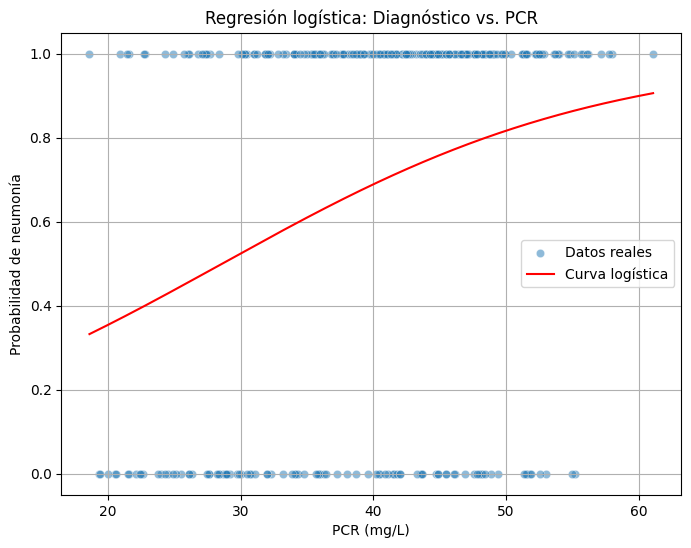

In [ ]:
#@title 📉 Ejemplo de regresión logística: Neumonía vs. PCR
from sklearn.linear_model import LogisticRegression

# Variables
X_log = data[['pcr']]
y_log = data['diagnostico_neumonia']

# Modelo
modelo_log = LogisticRegression()
modelo_log.fit(X_log, y_log)

# Predicciones (probabilidad)
x_range = np.linspace(data['pcr'].min(), data['pcr'].max(), 300).reshape(-1, 1)
y_pred_prob = modelo_log.predict_proba(x_range)[:, 1]

# Gráfico
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pcr', y='diagnostico_neumonia', data=data, label='Datos reales', alpha=0.5)
plt.plot(x_range, y_pred_prob, color='red', label='Curva logística')
plt.xlabel('PCR (mg/L)')
plt.ylabel('Probabilidad de neumonía')
plt.title('Regresión logística: Diagnóstico vs. PCR')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#@title 🤖 Entrenar modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# Ejemplo de regresión linea#@title 📊 Evaluación del modelo
predicciones = modelo.predict(X_test)
print("Exactitud del modelo (accuracy):", accuracy_score(y_test, predicciones))
print("\nReporte de clasificación:\n")
print(classification_report(y_test, predicciones))



Exactitud del modelo (accuracy): 0.6666666666666666

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.46      0.43      0.44        28
           1       0.75      0.77      0.76        62

    accuracy                           0.67        90
   macro avg       0.61      0.60      0.60        90
weighted avg       0.66      0.67      0.66        90



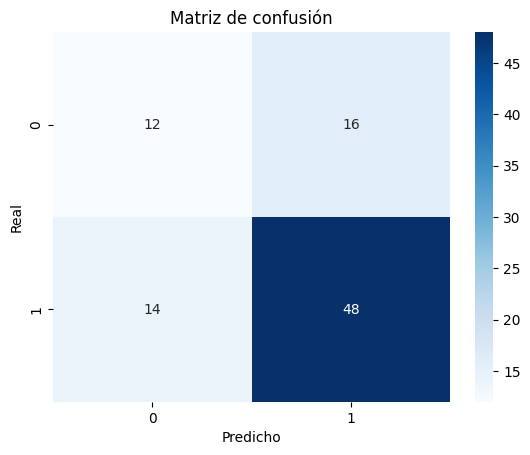

In [ ]:
# Matriz de confusión
def plot_confusion(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicho')
    plt.ylabel('Real')
    plt.title('Matriz de confusión')
    plt.show()

cm = confusion_matrix(y_test, predicciones)
plot_confusion(cm)


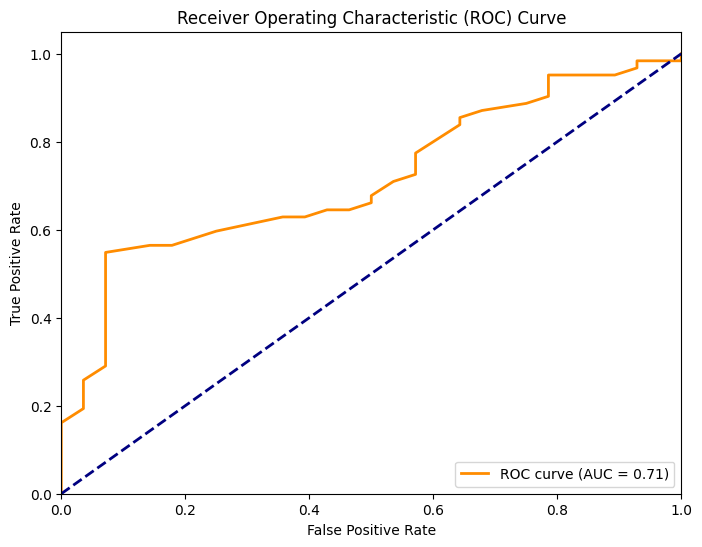

In [ ]:
# prompt: Create AUC/ROC curves for this random forest trained model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_prob = modelo.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
#@title 🔍 Simulador de predicción de neumonía

#@markdown Ingresa las características del paciente:
edad = 56  #@param {type: "slider", min: 18, max: 100, step: 1}
sexo = "F"  #@param ["M", "F"]
fiebre = 0  #@param {type:"slider", min:0, max:1, step:1}
tos = 1  #@param {type:"slider", min:0, max:1, step:1}
infiltrado_rx = 0  #@param {type:"slider", min:0, max:1, step:1}
engrosamiento_parietal = 0  #@param {type:"slider", min:0, max:1, step:1}
foco_condensacion = 0  #@param {type:"slider", min:0, max:1, step:1}
patron_intersticial = 1  #@param {type:"slider", min:0, max:1, step:1}
derrame_pleural = 0  #@param {type:"slider", min:0, max:1, step:1}
broncograma_aereo = 1  #@param {type:"slider", min:0, max:1, step:1}
cruza_cisuras = 1  #@param {type:"slider", min:0, max:1, step:1}
leucocitosis = 12000  #@param {type:"slider", min:4000, max:20000, step:500}
pcr = 43  #@param {type:"slider", min:0, max:100, step:1}

# Crear diccionario base con todas las columnas en 0
nuevo_paciente_dict = {col: 0 for col in X.columns}

# Actualizar valores conocidos
nuevo_paciente_dict.update({
    'edad': edad,
    'sexo_M': 1 if sexo == 'M' else 0,
    'fiebre': fiebre,
    'tos': tos,
    'infiltrado_rx': infiltrado_rx,
    'engrosamiento_parietal': engrosamiento_parietal,
    'foco_condensacion': foco_condensacion,
    'patron_intersticial': patron_intersticial,
    'derrame_pleural': derrame_pleural,
    'broncograma_aereo': broncograma_aereo,
    'cruza_cisuras': cruza_cisuras,
    'leucocitosis': leucocitosis,
    'pcr': pcr
})

# Crear DataFrame asegurando el orden
nuevo_paciente = pd.DataFrame([nuevo_paciente_dict], columns=X.columns)

# Predicción
pred_nuevo = modelo.predict(nuevo_paciente)
proba = modelo.predict_proba(nuevo_paciente)[0][1]

print("¿Tiene neumonía este paciente?")
print(f"Predicción: {pred_nuevo}")
print(f"Probabilidad estimada: {proba:.2%}")

¿Tiene neumonía este paciente?
Predicción: [1]
Probabilidad estimada: 80.17%


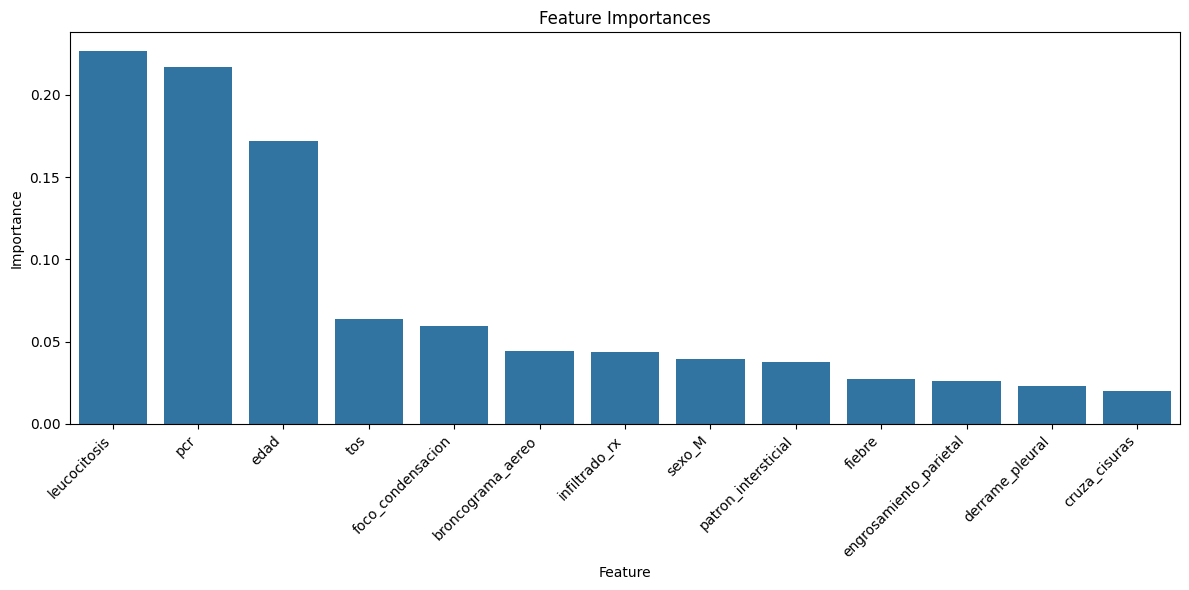

In [ ]:
#@title Explicabilidad
importances = modelo.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
sns.barplot(x=features[indices], y=importances[indices])
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right') # Rotar las etiquetas del eje x para mejor legibilidad
plt.tight_layout() # Ajustar el diseño para evitar que las etiquetas se superpongan
plt.show()



🔍 Modelo: Logística
              precision    recall  f1-score   support

           0       0.57      0.43      0.49        28
           1       0.77      0.85      0.81        62

    accuracy                           0.72        90
   macro avg       0.67      0.64      0.65        90
weighted avg       0.71      0.72      0.71        90

AUC: 0.80


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


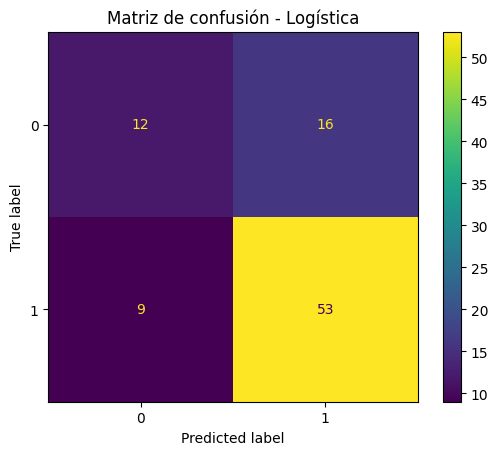


🔍 Modelo: Random Forest
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        28
           1       0.72      0.79      0.75        62

    accuracy                           0.64        90
   macro avg       0.56      0.56      0.56        90
weighted avg       0.62      0.64      0.63        90

AUC: 0.67


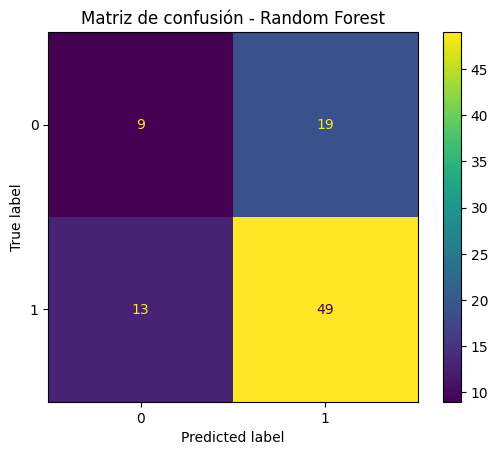


🔍 Modelo: SVM
              precision    recall  f1-score   support

           0       0.62      0.36      0.45        28
           1       0.76      0.90      0.82        62

    accuracy                           0.73        90
   macro avg       0.69      0.63      0.64        90
weighted avg       0.72      0.73      0.71        90

AUC: 0.76


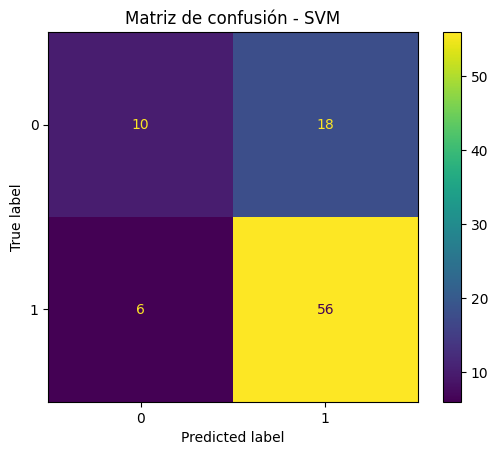


🔍 Modelo: Red Neuronal
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.69      1.00      0.82        62

    accuracy                           0.69        90
   macro avg       0.34      0.50      0.41        90
weighted avg       0.47      0.69      0.56        90

AUC: 0.49


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


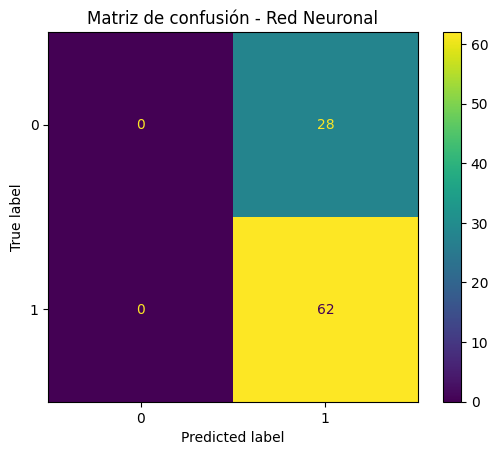

In [ ]:
#@title 🤖 Modelos adicionales: SVM y Red Neuronal simple
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# SVM lineal
modelo_svm = SVC(kernel='linear', probability=True)
modelo_svm.fit(X_train, y_train)

# Red neuronal simple
modelo_nn = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
modelo_nn.fit(X_train, y_train)

#@title 📊 Comparación de modelos y métricas
from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay

modelos = {
    'Logística': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC(kernel='linear', probability=True),
    'Red Neuronal': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
}

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]
    print(f"\n🔍 Modelo: {nombre}")
    print(classification_report(y_test, y_pred))
    print(f"AUC: {roc_auc_score(y_test, y_proba):.2f}")
    ConfusionMatrixDisplay.from_estimator(modelo, X_test, y_test)
    plt.title(f"Matriz de confusión - {nombre}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. 

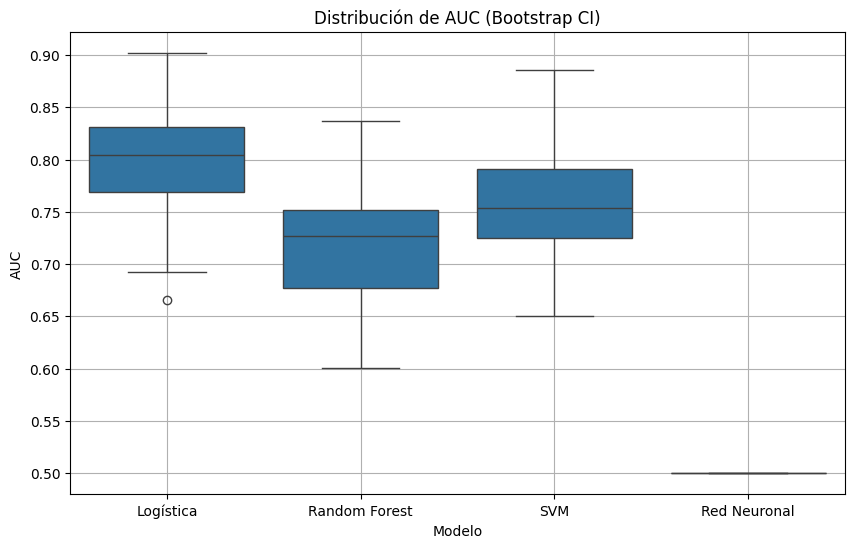

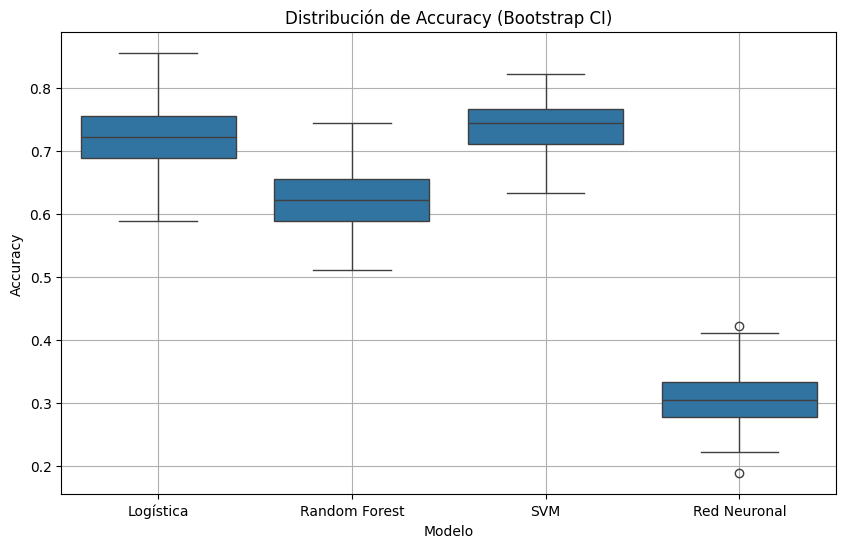

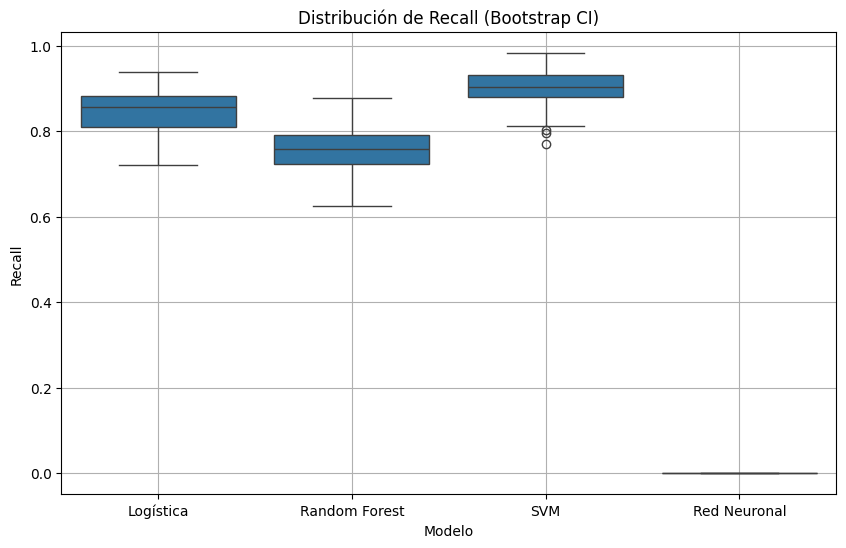

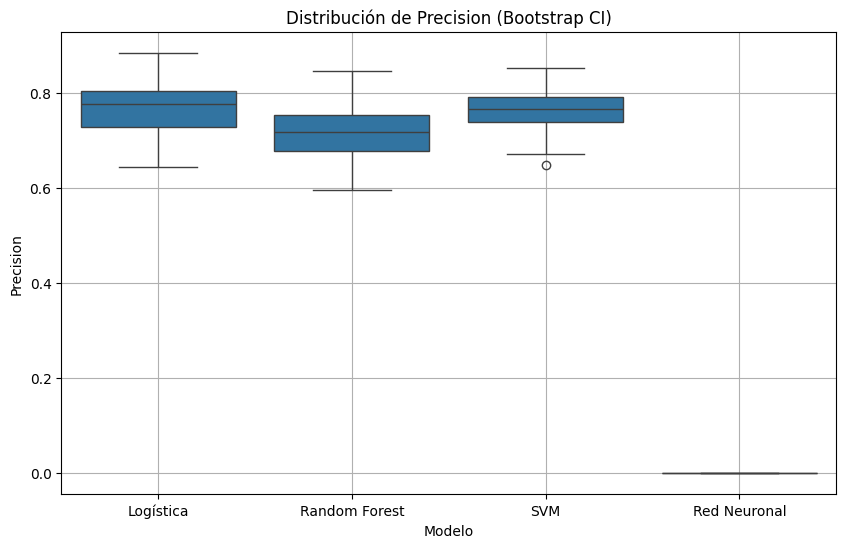

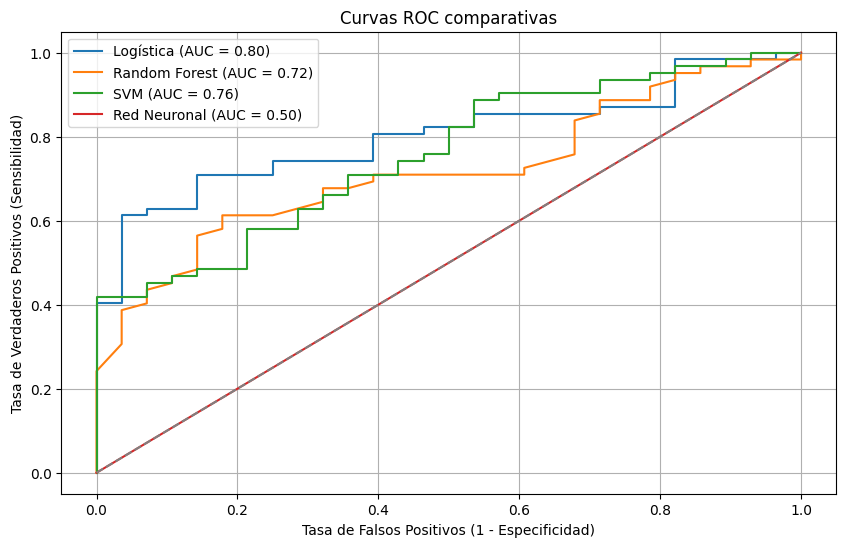

In [ ]:
#@title 📊 Comparación de modelos con Bootstrap y boxplots
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
import seaborn as sns


for modelo in modelos.values():
    modelo.fit(X_train, y_train)

# Bootstrap sobre test set
n_bootstraps = 100
metricas_boot = []
np.random.seed(42)

for i in range(n_bootstraps):
    indices = np.random.choice(len(X_test), len(X_test), replace=True)
    X_bs = X_test.iloc[indices]
    y_bs = y_test.iloc[indices]
    for nombre, modelo in modelos.items():
        y_pred = modelo.predict(X_bs)
        y_proba = modelo.predict_proba(X_bs)[:, 1]
        metricas_boot.append({
            'Modelo': nombre,
            'AUC': roc_auc_score(y_bs, y_proba),
            'Accuracy': accuracy_score(y_bs, y_pred),
            'Recall': recall_score(y_bs, y_pred),
            'Precision': precision_score(y_bs, y_pred)
        })

df_metricas = pd.DataFrame(metricas_boot)

# Gráfico boxplot de cada métrica
metricas_a_graficar = ['AUC', 'Accuracy', 'Recall', 'Precision']
for metrica in metricas_a_graficar:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_metricas, x='Modelo', y=metrica)
    plt.title(f"Distribución de {metrica} (Bootstrap CI)")
    plt.grid(True)
    plt.show()

#@title 📈 Curvas ROC comparativas
from sklearn.metrics import roc_curve

plt.figure(figsize=(10, 6))
for nombre, modelo in modelos.items():
    y_proba = modelo.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc_score(y_test, y_proba):.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Curvas ROC comparativas')
plt.legend()
plt.grid(True)
plt.show()


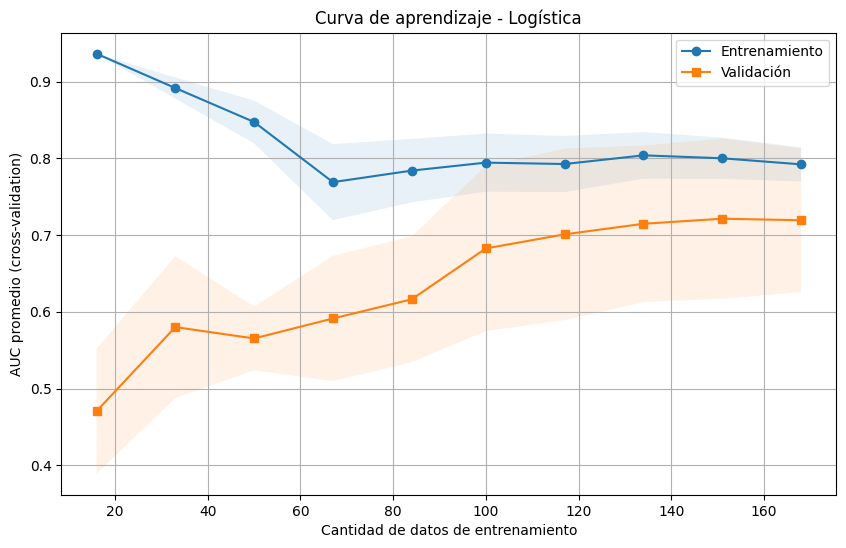

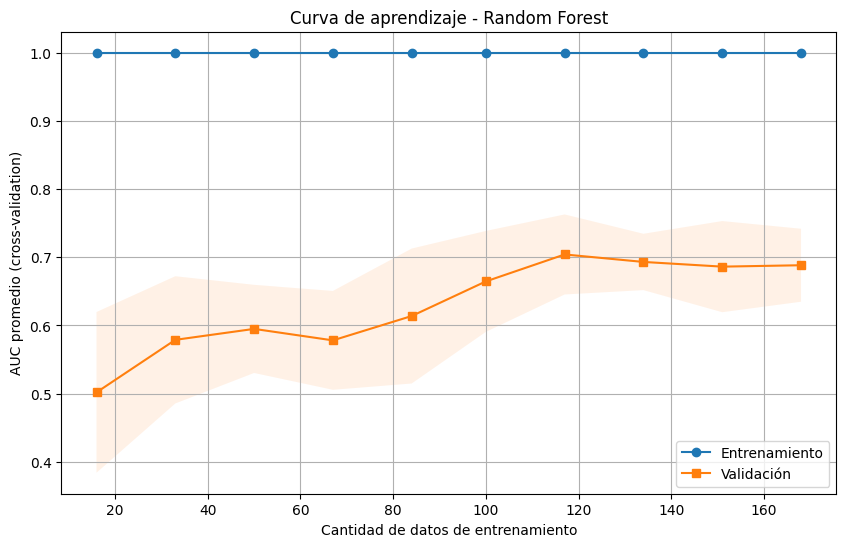

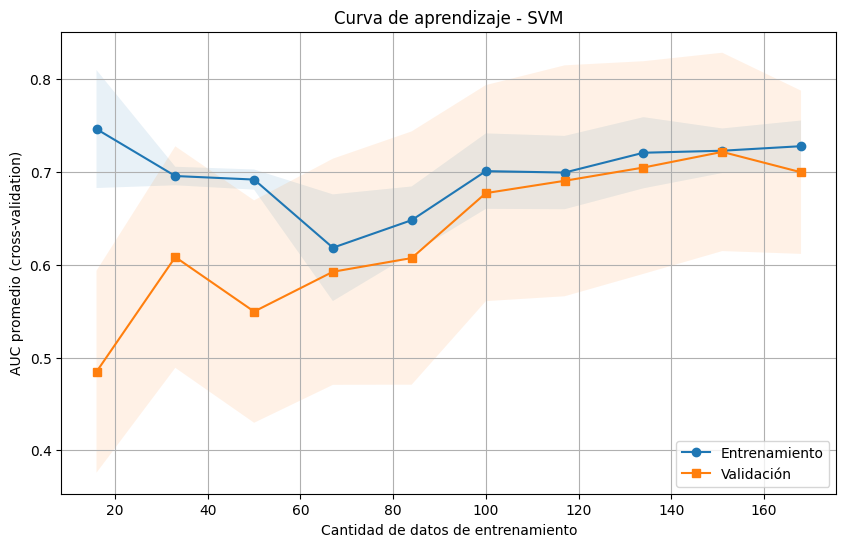

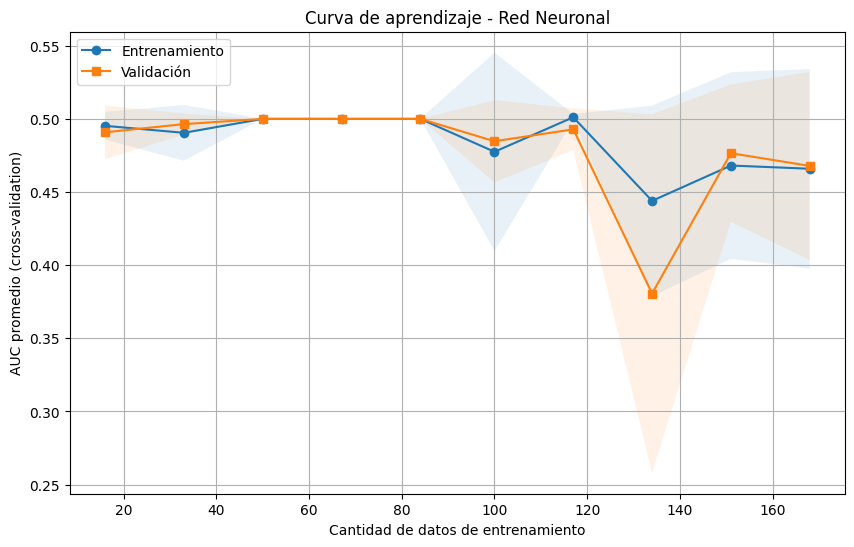

In [ ]:
#@title 📉 Curvas de underfitting vs overfitting por modelo
from sklearn.model_selection import learning_curve


train_sizes = np.linspace(0.1, 1.0, 10)

for nombre, modelo in modelos.items():
    train_sizes_abs, train_scores, val_scores = learning_curve(
        estimator=modelo,
        X=X_train,
        y=y_train,
        train_sizes=train_sizes,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    train_mean = train_scores.mean(axis=1)
    val_mean = val_scores.mean(axis=1)
    train_std = train_scores.std(axis=1)
    val_std = val_scores.std(axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes_abs, train_mean, label='Entrenamiento', marker='o')
    plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1)

    plt.plot(train_sizes_abs, val_mean, label='Validación', marker='s')
    plt.fill_between(train_sizes_abs, val_mean - val_std, val_mean + val_std, alpha=0.1)

    plt.title(f'Curva de aprendizaje - {nombre}')
    plt.xlabel('Cantidad de datos de entrenamiento')
    plt.ylabel('AUC promedio (cross-validation)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Optimización del modelo

In [ ]:
#@title 📈 Optimización de hiperparámetros y comparación de modelos
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Codificar y dividir datos
encoded_data = pd.get_dummies(data, columns=['sexo'], drop_first=True)
X_full = encoded_data.drop(columns=['diagnostico_neumonia', 'ingreso_uci', 'intubacion', 'mortalidad'], errors='ignore')
y_full = encoded_data['diagnostico_neumonia']

# Train, validation, test split
X_trainval, X_test, y_trainval, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Modelos base (sin ajustar)
model_lr = LogisticRegression(max_iter=1000)
model_rf = RandomForestClassifier(random_state=42)
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

# Optimización de hiperparámetros
param_grid_lr = {'C': [0.01, 0.1, 1, 10]}
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 3, 5, 10]}

grid_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid_lr, cv=5)
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_lr.fit(X_train, y_train)
grid_rf.fit(X_train, y_train)

best_lr = grid_lr.best_estimator_
best_rf = grid_rf.best_estimator_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

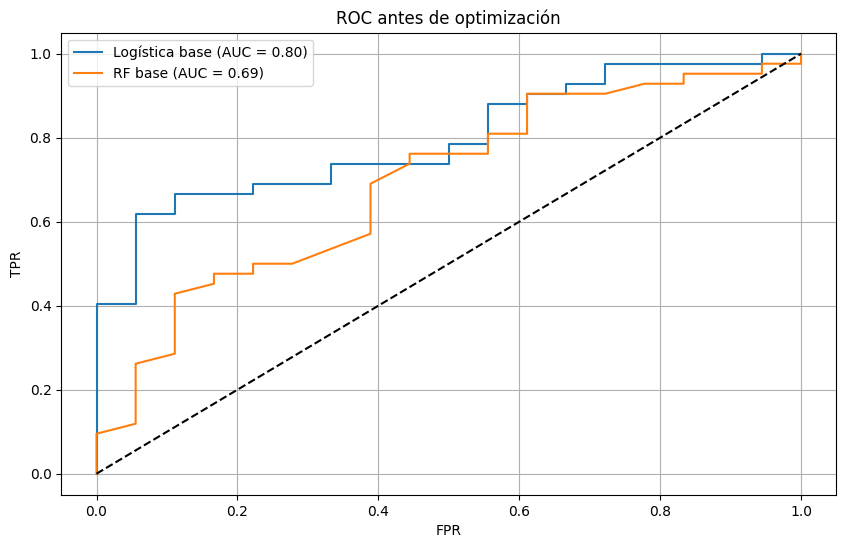

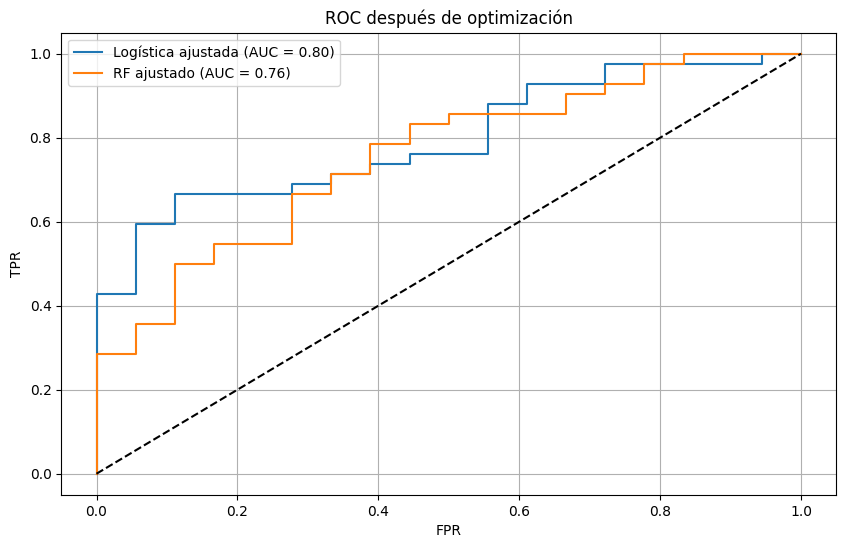

In [ ]:

# Evaluación en test set
def plot_roc_comparison(modelos, X, y, title):
    plt.figure(figsize=(10, 6))
    for nombre, modelo in modelos.items():
        proba = modelo.predict_proba(X)[:, 1]
        fpr, tpr, _ = roc_curve(y, proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{nombre} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Comparación pre y post optimización
modelos_pre = {'Logística base': model_lr, 'RF base': model_rf}
modelos_post = {'Logística ajustada': best_lr, 'RF ajustado': best_rf}

plot_roc_comparison(modelos_pre, X_test, y_test, 'ROC antes de optimización')
plot_roc_comparison(modelos_post, X_test, y_test, 'ROC después de optimización')



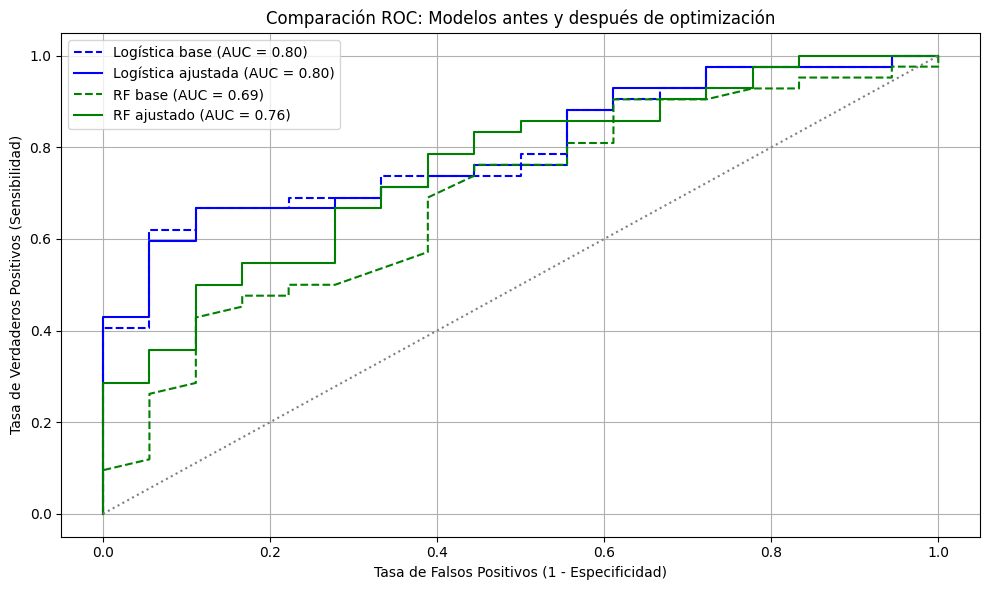

In [ ]:
#@title 📈 Comparación ROC: modelos base vs ajustados
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 6))

# ROC para Logística base y ajustada
for modelo, estilo in zip(['Logística base', 'Logística ajustada'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='blue', label=f"{modelo} (AUC = {roc_auc:.2f})")

# ROC para Random Forest base y ajustado
for modelo, estilo in zip(['RF base', 'RF ajustado'], ['--', '-']):
    modelo_actual = modelos_pre[modelo] if 'base' in modelo else modelos_post[modelo]
    proba = modelo_actual.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, linestyle=estilo, color='green', label=f"{modelo} (AUC = {roc_auc:.2f})")

# Diagonal de referencia
plt.plot([0, 1], [0, 1], linestyle=':', color='gray')

# Personalización
plt.xlabel('Tasa de Falsos Positivos (1 - Especificidad)')
plt.ylabel('Tasa de Verdaderos Positivos (Sensibilidad)')
plt.title('Comparación ROC: Modelos antes y después de optimización')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Selección de variables

Top 5 variables más importantes: ['leucocitosis', 'pcr', 'edad', 'broncograma_aereo', 'foco_condensacion']


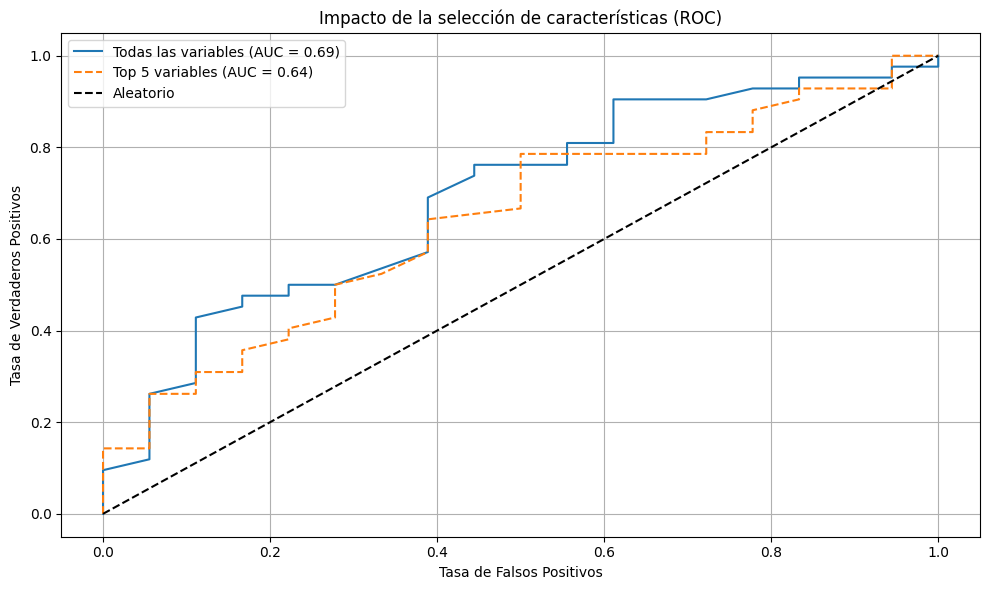

In [ ]:
#@title 📊 Comparación: modelo con todas las variables vs selección de características
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier

# Entrenamiento con todas las variables
modelo_completo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_completo.fit(X_train, y_train)
y_proba_completo = modelo_completo.predict_proba(X_test)[:, 1]
auc_completo = roc_auc_score(y_test, y_proba_completo)

# Obtener las 5 variables más importantes
importances = modelo_completo.feature_importances_
indices = np.argsort(importances)[::-1]
top_features = X.columns[indices[:5]]
print("Top 5 variables más importantes:", list(top_features))

# Entrenamiento solo con las top 5
modelo_reducido = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_reducido.fit(X_train[top_features], y_train)
y_proba_reducido = modelo_reducido.predict_proba(X_test[top_features])[:, 1]
auc_reducido = roc_auc_score(y_test, y_proba_reducido)

# Gráfico comparativo ROC
fpr_full, tpr_full, _ = roc_curve(y_test, y_proba_completo)
fpr_reduced, tpr_reduced, _ = roc_curve(y_test, y_proba_reducido)

plt.figure(figsize=(10, 6))
plt.plot(fpr_full, tpr_full, label=f"Todas las variables (AUC = {auc_completo:.2f})", linestyle='-')
plt.plot(fpr_reduced, tpr_reduced, label=f"Top 5 variables (AUC = {auc_reducido:.2f})", linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Aleatorio')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Impacto de la selección de características (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#✅ Conclusión

Hemos construido un modelo de aprendizaje supervisado que permite predecir el diagnóstico de neumonía
basado en variables clínicas e imagenológicas simples.

📌 Este ejemplo simplificado permite entender cómo funcionan los modelos sin necesidad de conocimientos avanzados.
👩‍⚕️ En la práctica clínica, se usarían imágenes reales, redes neuronales y validación más robusta.


# Discusión

¿Cómo puede un modelo de ML supervisado mejorar el trabajo del radiólogo?

# Bibliografía